## Linear regression with one variable

Suppose you are the CEO of a restaurant franchise and are considering different cities for opening a new outlet. The chain already has trucks in various cities and you have data for profits and populations from the cities. You would like to use this data to help you select which city to expand to next.
The file ex1data1.txt contains the dataset for our linear regression problem. The first column is the population of a city and the second column is the profit of a food truck in that city. A negative value for profit indicates a loss. 

### Plotting the data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Import data and load data into variable X and y
data = np.loadtxt('ex1data1.txt', delimiter=',')
X = data[:, 0]
y = data[:, 1]

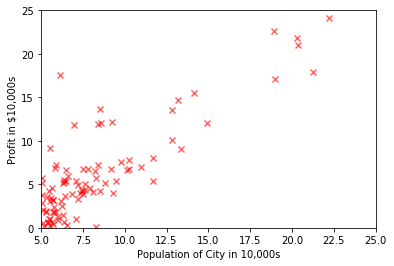

In [3]:
#Plot data
plt.scatter(X, y, c='red', marker='x', alpha= 0.6)
plt.xlim(5,25)
plt.ylim(0,25)
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.show()

### Gradient decent
#### Update equations

The objective of linear regression is to minimize the cost function
$$J(\theta)=\frac{1}{2m}\sum_{i=1}^{m}(h_{\theta}(x^{(i)})-y^{(i)})^2$$
where the hypothesis  is given by the linear model
$$h_\theta(x)=\theta^Tx=\theta_0+\theta_1x$$
Recall that the parameters of your model are the  values. These are the values you will adjust to minimize cost . One way to do this is to use the batch gradient descent algorithm. In batch gradient descent, each iteration performs the update

$$\theta_j:=\theta_j-\alpha\frac{1}{m}\sum_{i=1}^{m}(h_\theta(x^{(i)})-y^{(i)})x^{(i)}\qquad (simultaneously\;update\;\theta_j\;for\;all\;j)$$

With each step of gradient descent, your parameters  come closer to the optimal values that will achieve the lowest cost .

In [4]:
#Check the length of X
len(X)

97

In [5]:
#Implementation
X = X.reshape(97, 1)
y = y.reshape(97,1)
X = np.insert(X, 0, 1, axis=1)
theta = np.zeros((2, 1))
iterations = 1500
alpha = 0.01

In [6]:
#Define Computecost function
def Computecost(X, y, theta):
    m = len(y)
    H = np.dot(X, theta)
    J = 1/(2*m)*np.sum(np.power(H-y, 2))
    return J

In [7]:
#Test the function with all-zero theta
Computecost(X, y, theta)

32.072733877455676

In [8]:
#Test the data with non-zero theta
a = np.array([-1, 2])
a = a.reshape(2, 1)
Computecost(X, y, a)

54.24245508201238

#### Gradient decent

In [9]:
#Define a gradient decent function
def gradientDescent(X, y, theta, alpha, num_iters):
    m = len(y)
    for iter in range(num_iters):
        H = np.dot(X, theta) - y
        theta1 = theta[0] - alpha/m*sum(H)
        theta2 = theta[1] - alpha/m*sum(np.dot(np.transpose(H), X[:, 1]))
        theta[0] = theta1
        theta[1] = theta2
    return theta

In [10]:
#Use gradient decent to update theta
theta = gradientDescent(X, y, theta, alpha, iterations)
theta

array([[-3.63029144],
       [ 1.16636235]])

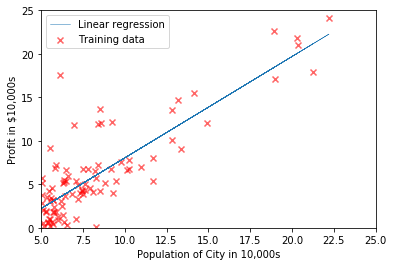

In [11]:
#Plot the linear fit
plt.figure(num=1)
plt.scatter(X[:, 1], y, c='red', marker='x', alpha= 0.6, label ='Training data')
plt.plot(X[:, 1], np.dot(X, theta), label='Linear regression', lw = 0.5)
plt.legend()
plt.xlim(5,25)
plt.ylim(0,25)
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.show()

#### Prediction

In [12]:
predict1 = np.dot(np.array([1, 3.5]).reshape(1, 2), theta)
print('For population = 35,000, we predict a profit of %f\n' % (predict1*10000))

For population = 35,000, we predict a profit of 4519.767868



In [13]:
predict2 = np.dot(np.array([1, 7]).reshape(1, 2), theta)
print('For population = 70,000, we predict a profit of %f\n' % (predict2*10000))

For population = 70,000, we predict a profit of 45342.450129



### Visualizing $J(\theta)$

To understand the cost function  better, you will now plot the cost over a 2-dimensional grid of  and  values. You will not need to code anything new for this part, but you should understand how the code you have written already is creating these images.

In [14]:
#Get a series value of theta0 and theta1
theta0_vals = np.linspace(-10, 10, 100).reshape(100,1)
theta1_vals = np.linspace(-1, 4, 100).reshape(100,1)
J_vals = np.zeros((len(theta0_vals), len(theta1_vals)))

In [15]:
theta1_vals[1, 0]

-0.9494949494949495

In [16]:
t = np.zeros((2, 1))
for i in range(len(theta0_vals)):
    for j in range(len(theta1_vals)):
        t[0, 0] = theta0_vals[i, 0]
        t[1, 0] = theta1_vals[j, 0]
        J_vals[i, j] = Computecost(X, y, t)

In [17]:
J_vals = J_vals.T
theta0_vals, theta1_vals = np.meshgrid(theta0_vals, theta1_vals)

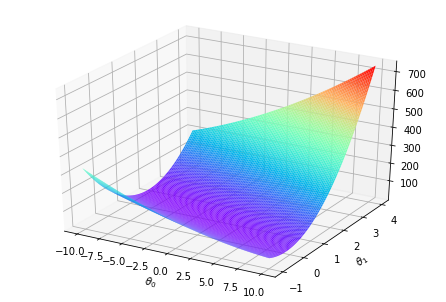

In [18]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
ax.plot_surface(theta0_vals, theta1_vals, J_vals, rstride=1, cstride=1, cmap='rainbow')
plt.xlabel(r'$\theta_0$')
plt.ylabel(r'$\theta_1$')
plt.show()

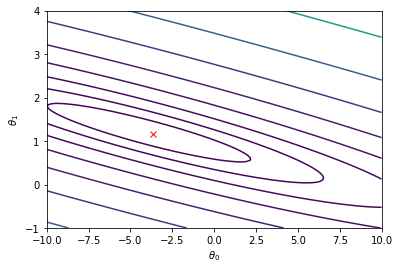

In [19]:
plt.figure()
plt.contour(theta0_vals, theta1_vals, J_vals, levels = np.logspace(-2, 3, 20))
plt.xlabel(r'$\theta_0$')
plt.ylabel(r'$\theta_1$')
plt.plot(theta[0,0], theta[1,0], marker='x', c='red')
plt.show()

The purpose of these graphs is to show you that how $J(\theta)$ varies with changes in $\theta_0$ and $\theta_1$. The cost function $J(\theta)$ is bowl-shaped and has a global mininum. (This is easier to see in the contour plot than in the 3D surface plot). This minimum is the optimal point for $\theta_0$ and $\theta_1$, and each step of gradient descent moves closer to this point.

## Linear regression with multiple variables

In this part, you will implement linear regression with multiple variables to predict the prices of houses. Suppose you are selling your house and you want to know what a good market price would be. One way to do this is to first collect information on recent houses sold and make a model of housing prices.
    
The file ex1data2.txt contains a training set of housing prices in Portland, Oregon. The first column is the size of the house (in square feet), the second column is the number of bedrooms, and the third column is the price of the house. Run this section now to preview the data.

In [20]:
#Import data and load data into variable X and y
data = np.loadtxt('ex1data2.txt', delimiter=',')
X = data[:, 0:2]
y = data[:, -1]
print('x is a %s array, y is a %s array' % (X.shape, y.shape))

x is a (47, 2) array, y is a (47,) array


### Feature Normalization

In [21]:
#Define a feature normalize function
def featureNormailze(X):
    X_norm = X
    mu = np.zeros((1, X.shape[1]))
    sigma = np.zeros((1, X.shape[1]))
    for i in range(X.shape[1]):
        mu[0, i] = np.mean(X[:, i])
        sigma[0, i] = np.std(X[:, i])
        X_norm[:, i] = (X_norm[:, i] - mu[0, i])/sigma[0, i]
    return X_norm, mu, sigma

In [22]:
X, mu, sigma = featureNormailze(X)

In [23]:
#Add intercept terms into X
X = np.insert(X, 0, 1, axis=1) 

In [24]:
y = y.reshape(47,1)
y, mu_y, sigma_y = featureNormailze(y)

### Gradient Descent

In [27]:
# Define all the parameters we need to run a gradient descent
alpha = 0.1
num_iters = 400
theta = np.zeros((3, 1))

In [28]:
#Define multi-variable gradient descent
def gradientDescentMulti(X, y, theta, alpha, num_iters):
    m = len(y)
    theta_i = theta
    for iter in range(num_iters):
        H = np.dot(X, theta) - y
        for i in range(X.shape[1]):
            theta_i[i, :] = theta[i, :] -alpha/m*sum(np.dot(H.T, X[:, i]))
            theta[i, :] = theta_i[i, :]
    return theta

In [29]:
theta = gradientDescentMulti(X, y, theta, alpha, num_iters)
print('Theta computed from gradient descent:\n%f, \n%f, \n%f' % (theta[0], theta[1], theta[2]))

Theta computed from gradient descent:
-0.000000, 
0.884766, 
-0.053179


In [42]:
 def predict(x_pre, theta, mu, sigma, mu_y, sigma_y):
        x_norm = x_pre
        for i in range(x_pre.shape[1]):
            x_norm[:, i] = (x_pre[:, i] - mu[:, i])/sigma[:, i]
        x_pre = np.insert(x_norm, 0, 1, axis=1) 
        y = np.dot(x_pre, theta)
        if len(y) > 1:
            predict = np.dot(y, sigma_y) + mu_y.repeat(len(y)-1, axis=0)
        else:
            predict = np.dot(y, sigma_y) + mu_y
        return predict

In [43]:
x_pre = np.array([1650, 3]).reshape(1,2)
predict = predict(x_pre, theta, mu, sigma, mu_y, sigma_y)

(1, 1)


In [55]:
print('Predicted price of a 1650 sq-ft, 3br house (using gradient descent):\n%f' % (predict[0][0]))

Predicted price of a 1650 sq-ft, 3br house (using gradient descent):
340412.659574


### Normal Equations

In the lecture videos, you learned that the closed-form solution to linear regression is
$$\theta=(X^TX)^-1X^T\vec{y}$$
Using this formula does not require any feature scaling, and you will get an exact solution in one calculation: there is no "loop until convergence" like in gradient descent.

In [56]:
#Import data and load data into variable X and y
data = np.loadtxt('ex1data2.txt', delimiter=',')
X = data[:, 0:2]
y = data[:, -1]
m = len(y)

#Add intercept term to X
X = np.insert(X, 0, 1, axis=1)

In [59]:
#Define the normal equation function
def normalEqn(X,y):
    theta = np.zeros((X.shape[1], 1))
    theta = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), y)
    return theta

In [60]:
theta = normalEqn(X,y)
theta

array([89597.9095428 ,   139.21067402, -8738.01911233])